In [2]:
import os
import aplpy
import matplotlib
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from mpdaf.obj import Cube, WCS, WaveCoord, iter_spe
from matplotlib import rc
from matplotlib import cm
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from matplotlib.colors import ListedColormap
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs.utils import pixel_to_skycoord
from astropy.table import Table
from astropy.utils.data import get_pkg_data_filename
from astropy.io.fits import getheader

def ConvertFits(filename='image_OIII_5008_line_SB_offset'):
    path = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', filename + '.fits')
    data, hdr = fits.getdata(path, 1, header=True)
    fits.writeto('/Users/lzq/Dropbox/Data/CGM/' + filename + '_revised.fits', data, overwrite=True)
    data1, hdr1 = fits.getdata('/Users/lzq/Dropbox/Data/CGM/' + filename + '_revised.fits', 0, header=True)
    hdr1['BITPIX'], hdr1['NAXIS'], hdr1['NAXIS1'], hdr1['NAXIS2'] = hdr['BITPIX'], hdr['NAXIS'], hdr['NAXIS1'], hdr['NAXIS2']
    hdr1['CRPIX1'], hdr1['CRPIX2'], hdr1['CTYPE1'], hdr1['CTYPE2'] = hdr['CRPIX1'], hdr['CRPIX2'], hdr['CTYPE1'], hdr['CTYPE2']
    hdr1['CRVAL1'], hdr1['CRVAL2'], hdr1['LONPOLE'], hdr1['LATPOLE'] = hdr['CRVAL1'], hdr['CRVAL2'], hdr['LONPOLE'], hdr['LATPOLE']
    hdr1['CSYER1'], hdr1['CSYER2'], hdr1['MJDREF'], hdr1['RADESYS'] = hdr['CSYER1'], hdr['CSYER2'], hdr['MJDREF'], hdr['RADESYS']
    hdr1['CD1_1'], hdr1['CD1_2'], hdr1['CD2_1'], hdr1['CD2_2'] =  hdr['CD1_1'], hdr['CD1_2'], hdr['CD2_1'], hdr['CD2_2']
    # Rescale the data by 1e17
    fits.writeto('/Users/lzq/Dropbox/Data/CGM/' + filename + '_revised.fits', data1 * 1e17, hdr1, overwrite=True)

# ConvertFits(filename='image_OII_line_SB_offset')


INFO: Auto-setting vmin to -1.261e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.126e+00 [aplpy.core]


/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")


INFO: Auto-setting vmin to -1.036e+00 [aplpy.core]
INFO: Auto-setting vmax to  3.725e+00 [aplpy.core]


/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")


INFO: Auto-setting vmin to -1.870e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.355e+01 [aplpy.core]


/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")


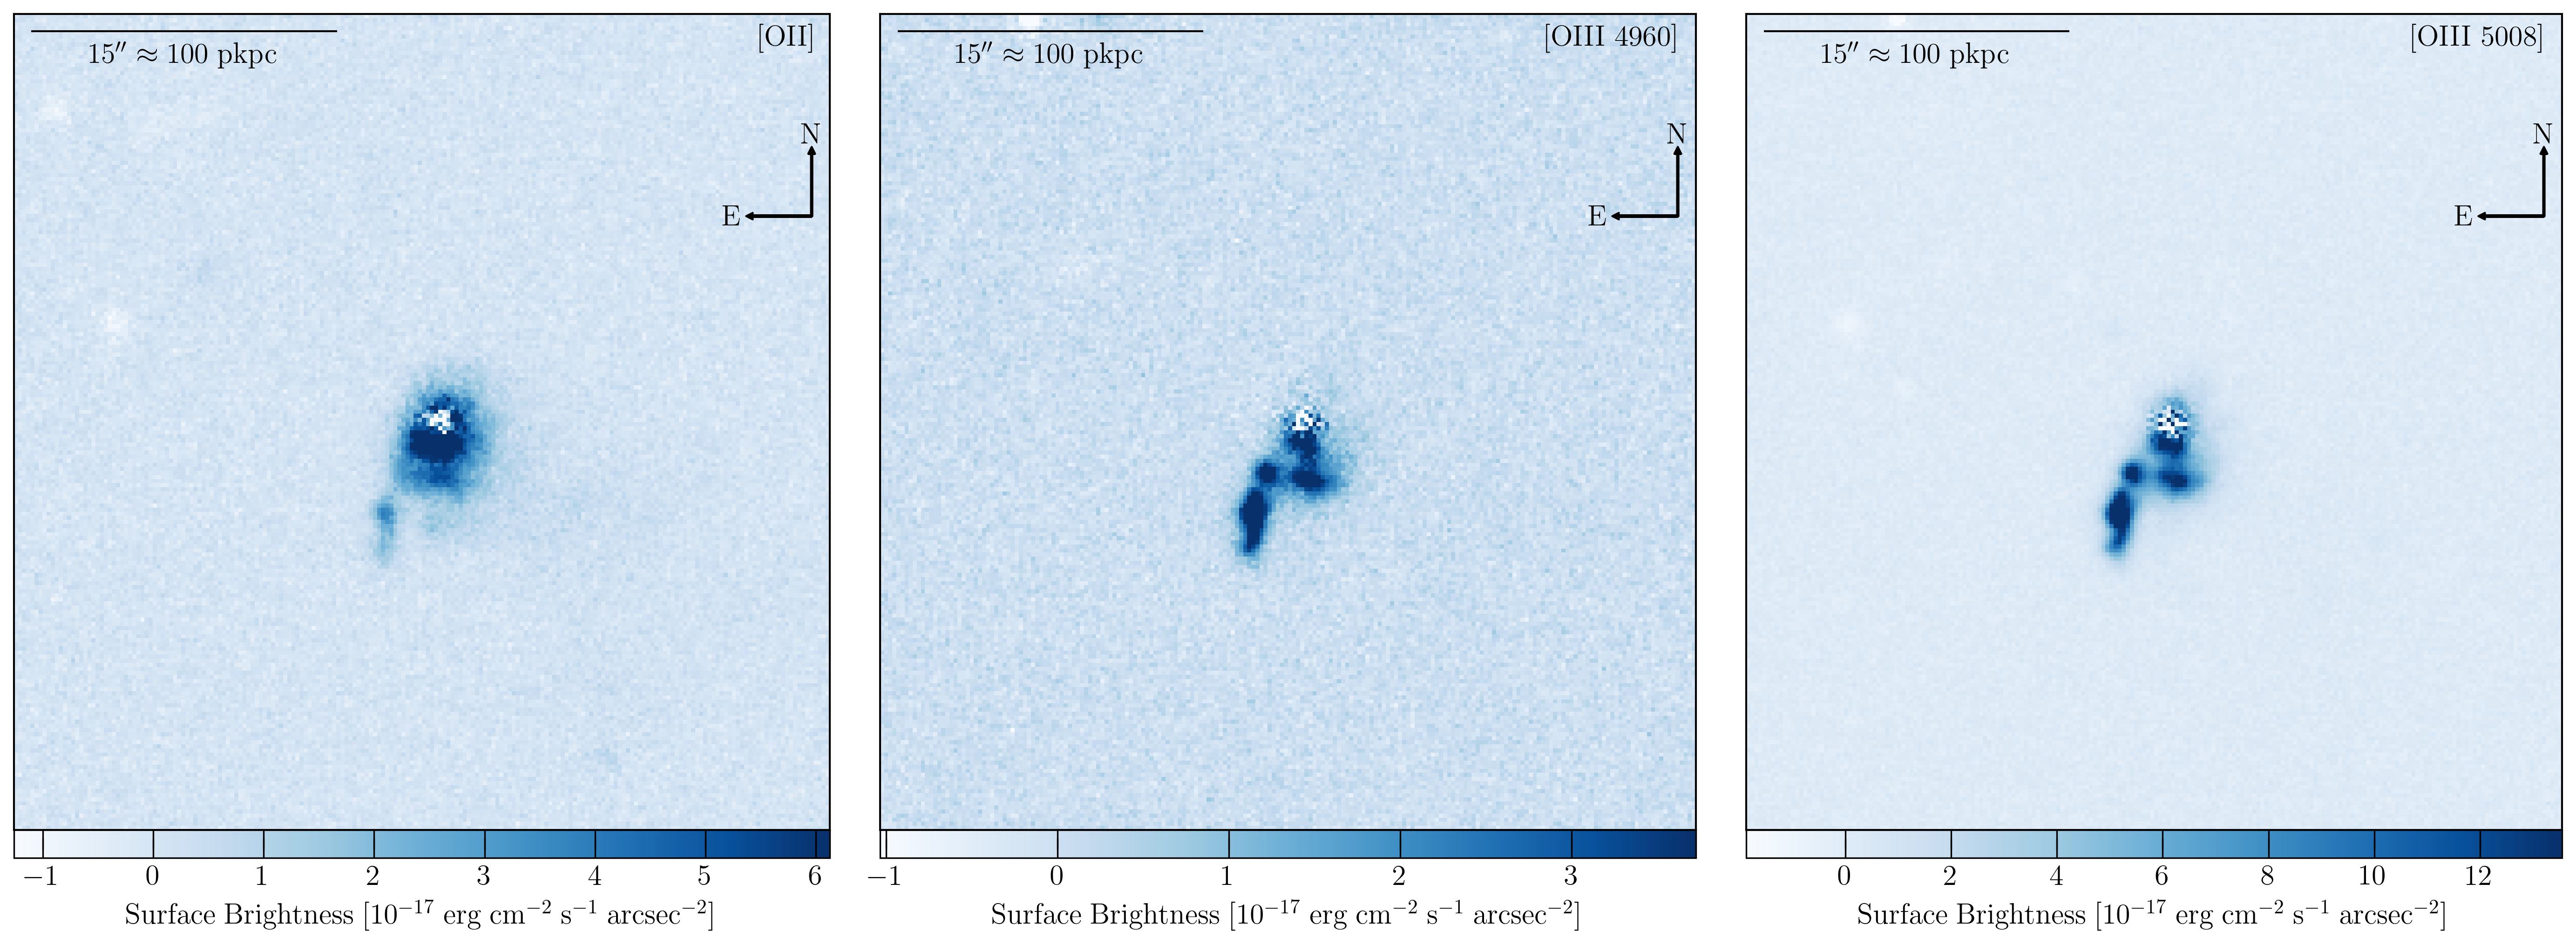

In [4]:
from astropy import units as u
import matplotlib as mpl
from astropy.cosmology import FlatLambdaCDM
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})
rc('text', usetex=True)
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10

# QSO property
z = 0.6282144177077355
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
d_l = cosmo.angular_diameter_distance(z=z)
ratio = (1 * u.radian).to(u.arcsec).value 
arcsec_15 = (15 * d_l / ratio).to(u.kpc).value
# print(arcsec_15)

path_OII = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OII_line_SB_offset_revised.fits')
path_OIII_4960 = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OIII_4960_line_SB_offset_revised.fits')
path_OIII_5008 = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OIII_5008_line_SB_offset_revised.fits')
Blues = cm.get_cmap('Blues', 256)
Reds = cm.get_cmap('Reds', 256)
newcolors = Blues(np.linspace(0, 1, 256))
newcolors_red = Reds(np.linspace(0, 1, 256))
newcmp = ListedColormap(newcolors)

fig = plt.figure(figsize=(24, 8), dpi=300)
# fig.tight_layout()
plt.subplots_adjust(wspace=0.)
gc = aplpy.FITSFigure(path_OII, figure=fig, subplot=(1, 3, 1), north=True)
gc.set_system_latex(True)
gc.show_colorscale(cmap=newcmp)
gc.add_colorbar()
gc.ticks.set_length(30)
# gc.show_regions('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg')
gc.colorbar.set_location('bottom')
gc.colorbar.set_pad(0.0)
gc.colorbar.set_axis_label_text(r'$\mathrm{Surface \; Brightness \; [10^{-17} \; erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$')
gc.colorbar.set_font(size=15)
gc.colorbar.set_axis_label_font(size=15)
gc.add_scalebar(length=15 * u.arcsecond)
gc.scalebar.set_corner('top left')
gc.scalebar.set_label(r"$15'' \approx 100 \mathrm{\; pkpc}$")
gc.scalebar.set_font_size(15)
gc.ticks.hide()
gc.tick_labels.hide()
gc.axis_labels.hide()
gc.add_label(0.95, 0.97, r'[OII]', size=15, relative=True)
xw, yw = gc.pixel2world(195, 150)
gc.show_arrows(xw, yw, -0.00005 * yw, 0, color='k')
gc.show_arrows(xw, yw, 0, -0.00005 * yw, color='k')
gc.add_label(0.9775, 0.85, r'N', size=15, relative=True)
gc.add_label(0.88, 0.75, r'E', size=15, relative=True)

gc = aplpy.FITSFigure(path_OIII_4960, figure=fig, subplot=(1, 3, 2), north=True)
gc.set_system_latex(True)
gc.show_colorscale(cmap=newcmp)
gc.add_colorbar()
gc.ticks.set_length(30)
# gc.show_regions('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg')
gc.colorbar.set_location('bottom')
gc.colorbar.set_pad(0.0)
gc.colorbar.set_axis_label_text(r'$\mathrm{Surface \; Brightness \; [10^{-17} \; erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$')
gc.colorbar.set_font(size=15)
gc.colorbar.set_axis_label_font(size=15)
gc.add_scalebar(length=15 * u.arcsecond)
gc.scalebar.set_corner('top left')
gc.scalebar.set_label(r"$15'' \approx 100 \mathrm{\; pkpc}$")
gc.scalebar.set_font_size(15)
gc.ticks.hide()
gc.tick_labels.hide()
gc.axis_labels.hide()
gc.add_label(0.90, 0.97, r'[OIII 4960]', size=15, relative=True)
xw, yw = gc.pixel2world(195, 150)
gc.show_arrows(xw, yw, -0.00005 * yw, 0, color='k')
gc.show_arrows(xw, yw, 0, -0.00005 * yw, color='k')
gc.add_label(0.9775, 0.85, r'N', size=15, relative=True)
gc.add_label(0.88, 0.75, r'E', size=15, relative=True)
# plt.savefig('/Users/lzq/Dropbox/Data/CGM_plots/OIII_image.pdf', bbox_inches='tight')

gc = aplpy.FITSFigure(path_OIII_5008, figure=fig, subplot=(1, 3, 3), north=True)
gc.set_system_latex(True)
gc.show_colorscale(cmap=newcmp)
gc.add_colorbar()
gc.ticks.set_length(30)
# gc.show_regions('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg')
gc.colorbar.set_location('bottom')
gc.colorbar.set_pad(0.0)
gc.colorbar.set_axis_label_text(r'$\mathrm{Surface \; Brightness \; [10^{-17} \; erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$')
gc.colorbar.set_font(size=15)
gc.colorbar.set_axis_label_font(size=15)
gc.add_scalebar(length=15 * u.arcsecond)
gc.scalebar.set_corner('top left')
gc.scalebar.set_label(r"$15'' \approx 100 \mathrm{\; pkpc}$")
gc.scalebar.set_font_size(15)
gc.ticks.hide()
gc.tick_labels.hide()
gc.axis_labels.hide()
gc.add_label(0.90, 0.97, r'[OIII 5008]', size=15, relative=True)
xw, yw = gc.pixel2world(195, 150)
gc.show_arrows(xw, yw, -0.00005 * yw, 0, color='k')
gc.show_arrows(xw, yw, 0, -0.00005 * yw, color='k')
gc.add_label(0.9775, 0.85, r'N', size=15, relative=True)
gc.add_label(0.88, 0.75, r'E', size=15, relative=True)
fig.savefig('/Users/lzq/Dropbox/Data/CGM_plots/Narrow_band_image.pdf', bbox_inches='tight')


In [ ]:
# plt.figure(figsize=(8, 5), dpi=300)
# fig = plt.subplot(projection=wcs)
# plt.imshow(np.log10(hdu.data), cmap=newcmp, vmin=-15, origin='lower')
# #plt.axis('off')
# plt.title(r'[OIII]', size=15, x=0.9, y=0.9)
# c = plt.axes([0.27, 0.01, 0.5, 0.02])
# cbar = plt.colorbar(cax=c, orientation='horizontal')
# cbar.ax.tick_params(labelsize=10) 
# cbar.set_label(r'$\mathrm{log(Surface \; Brightness)[erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$') 
# plt.savefig('OIII_image.pdf', bbox_inches='tight')

In [ ]:
# path = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OII_line_SB_offset.fits')
# data = fits.getdata(path, 1, ignore_missing_end=True)


# Blues = cm.get_cmap('Blues', 256)
# Reds = cm.get_cmap('Reds', 256)
# newcolors = Blues(np.linspace(0, 1, 256))
# newcolors_red = Reds(np.linspace(0, 1, 256))
# newcmp = ListedColormap(newcolors)

# plt.figure(figsize=(8, 5), dpi=300)
# plt.imshow(np.log10(data), cmap=newcmp, vmin=-15, origin='lower')
# #plt.axis('off')
# plt.title(r'[OII]', size=15, x=0.9, y=0.9)
# c = plt.axes([0.27, 0.01, 0.5, 0.02])
# cbar = plt.colorbar(cax=c, orientation='horizontal')
# cbar.ax.tick_params(labelsize=10) 
# cbar.set_label(r'$\mathrm{log(Surface \; Brightness)[erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$') 
# plt.savefig('OII_image.pdf', bbox_inches='tight')